In [1]:
import vmbench as tk

vmbench = tk.Benchmark("vm")
classic = tk.Branch("classic").execute(vmbench, pprof=tk.BENCHMARK_PPROF, callgraph=17)
sputnik = tk.Branch("sputnik").execute(vmbench, pprof=tk.BENCHMARK_PPROF, callgraph=20)


in the dir C:\Projects\_GoPkg_\src\github.com\sudachen\playground\benchmarks\vm\classic
	executing: go run benchmark.go --pprof --cpuprof=benchmark.pprof --callgraph=17
in the dir C:\Projects\_GoPkg_\src\github.com\sudachen\playground\benchmarks\vm\sputnik
	executing: go run benchmark.go --pprof --cpuprof=benchmark.pprof --callgraph=20


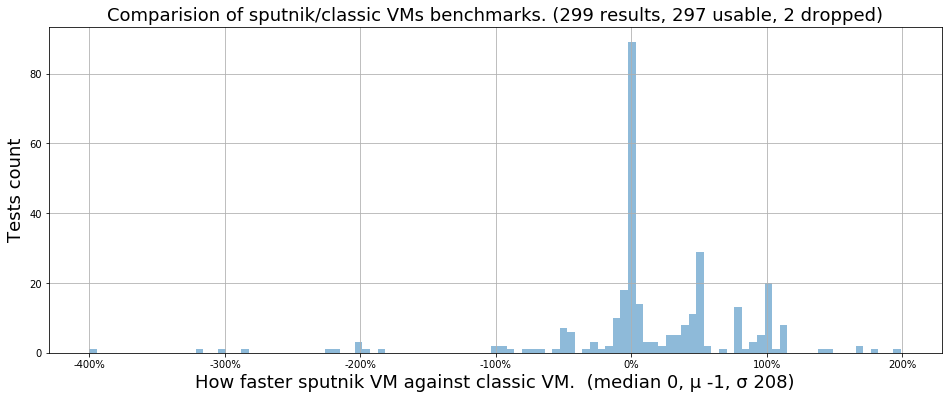

In [2]:
def transform(b,t):
    if b.active > 0 and t.active > 0: 
        r = (t.active/b.active)
        return int(r*100-100) if r >= 1 else int(-1/r*100+100)
        
tk.plot_bench_hist(classic, sputnik, transform)

In [3]:
tk.plot_fast_slow_tests(classic, sputnik, transform)    


# How fast and slow is Sputnik VM against Classic VM by tests

,,,
Name,Sputnik vs Classic,Sputnik,Classic
Memory/mem64kb_singleByte+1,199% faster,0.001s,0.003s
Memory/mem64kb_singleByte-33,179% faster,0.001s,0.003s
SystemOperations/CallToNameRegistratorTooMuchMemory0,170% faster,0.001s,0.003s
Special/makeMoney,168% faster,0.001s,0.003s
BlockHash/blockhashDOS-sec71,148% faster,1.389s,3.451s
SystemOperations/CallRecursiveBomb0_OOG_atMaxCallDepth,141% faster,0.956s,2.306s
CallCreateCallCode/CallRecursiveBombPreCall,113% faster,0.581s,1.240s
SystemOperations/CallRecursiveBomb0,112% faster,0.717s,1.521s
Memory/log2_dejavu,111% faster,0.001s,0.002s


# TOP un-tagged calls

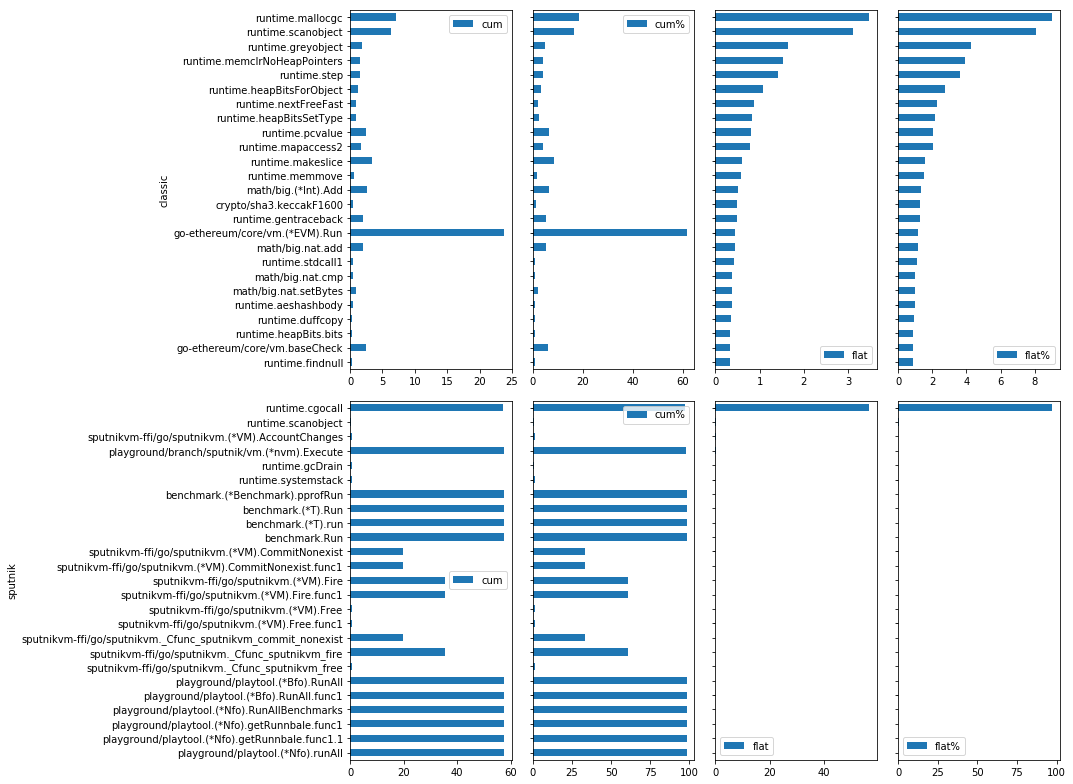

In [4]:
tk.plot_pprof('TOP un-tagged calls', 'top-all', classic, sputnik)

# TOP tagged calls

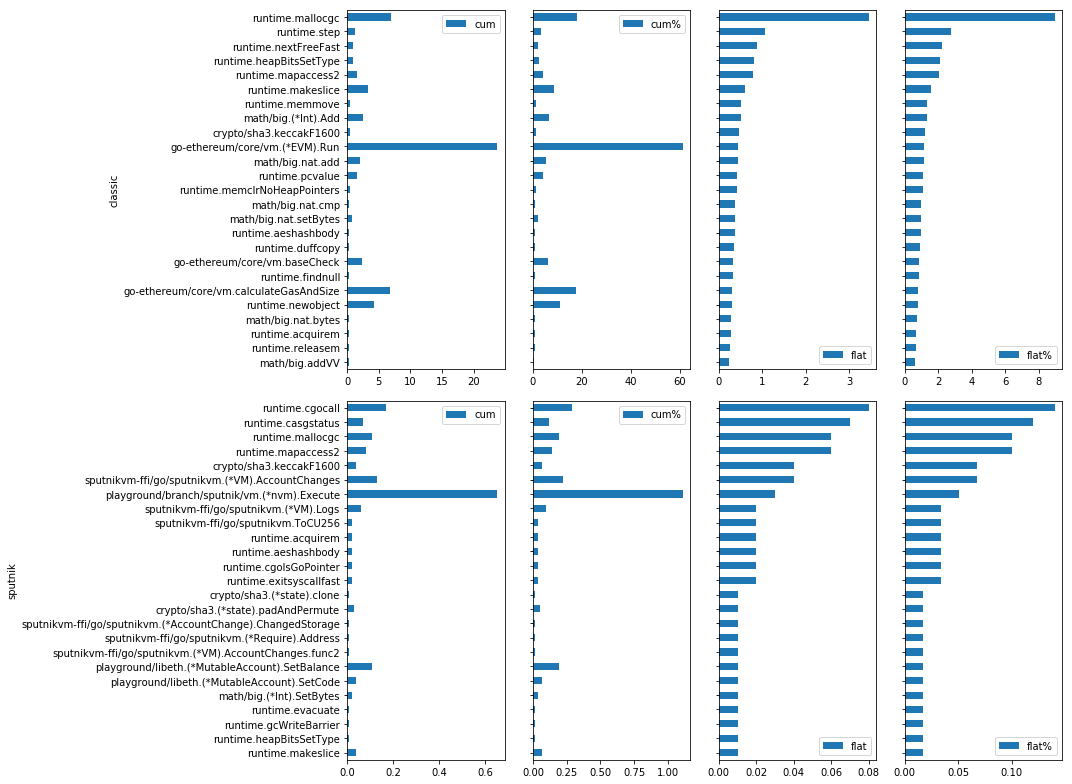

In [5]:
tk.plot_pprof('TOP tagged calls', 'top', classic, sputnik)

# Top calls on Classic VM

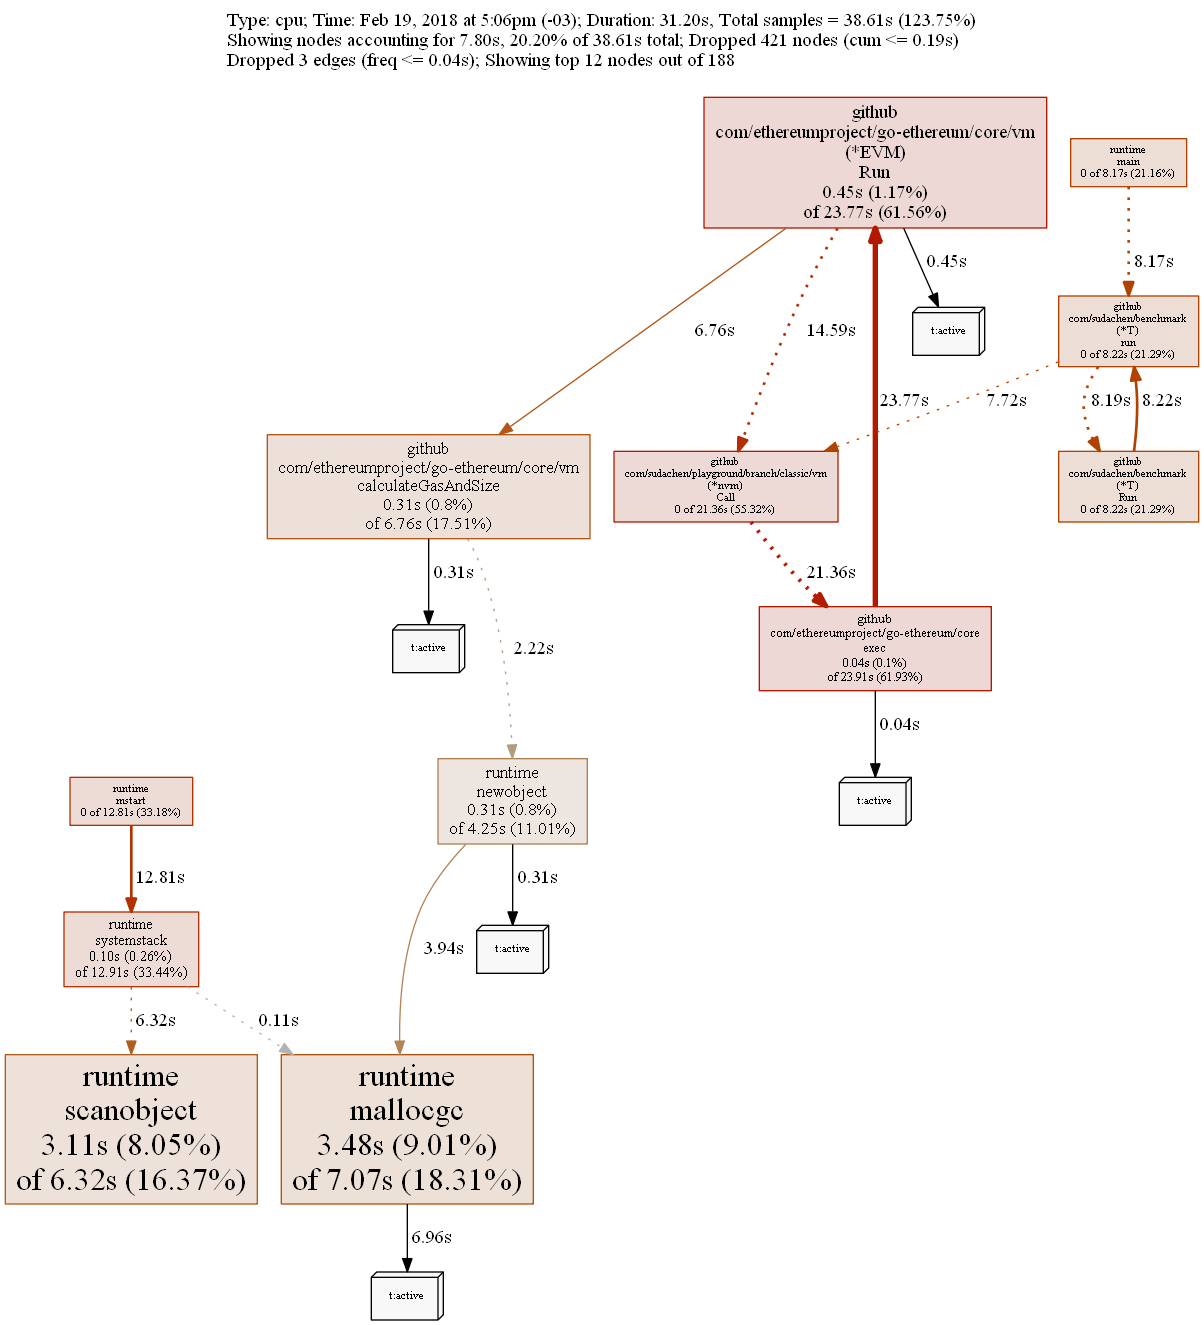

In [6]:
tk.plot_pprof_image('Top calls on Classic VM', 'top-all', classic)

# Top calls on Sputnik VM

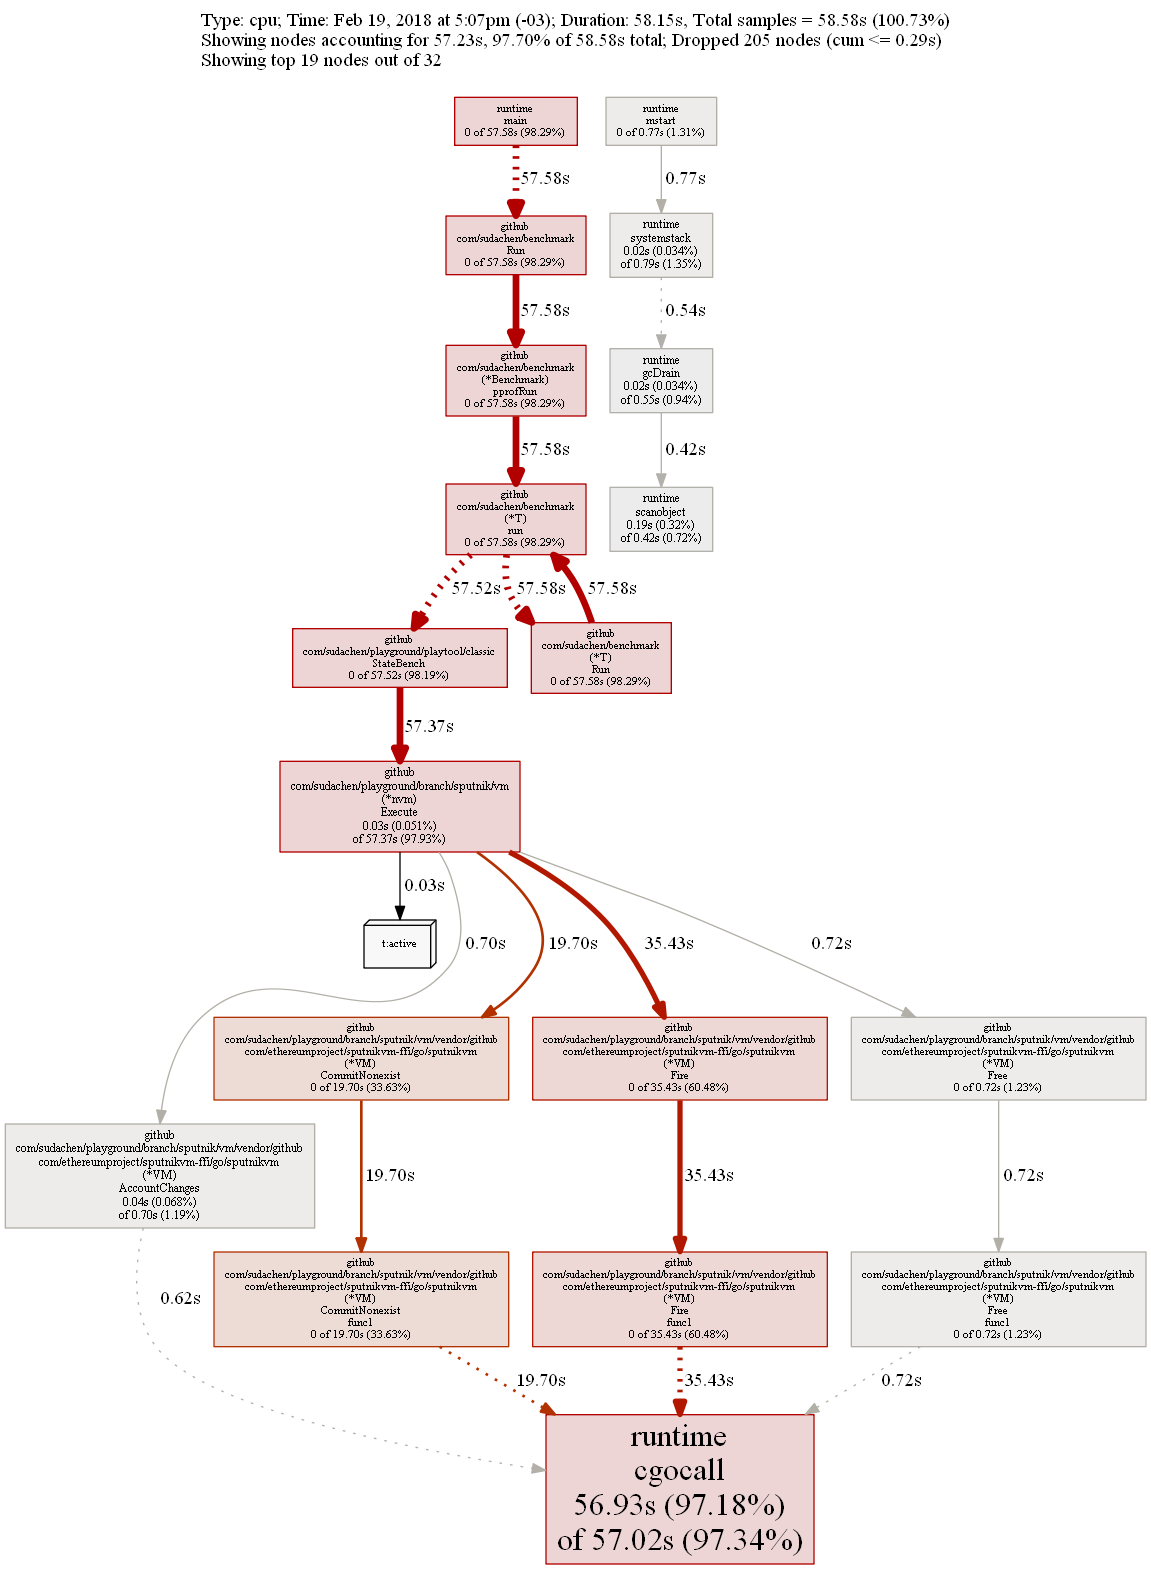

In [7]:
tk.plot_pprof_image('Top calls on Sputnik VM', 'top-all', sputnik)